# Ejercicio 3. Titanic

Uno de los conjuntos de datos más típicos utilizados, de forma académica, para explicar conceptos de data science es el que contiene información de personas supervivientes y fallecidas en el hundimiento del Titanic.

Para obtener este conjunto de datos descargar el fichero train.csv de la página de la competición Titanic: Machine learning for disaster (https://www.kaggle.com/c/titanic/data).

## Explorando el Titanic

El objetivo de este ejercicio, es realizar un análisis exploratorio sencillo sobre este conjunto de datos, utilizando las diferentes funcionalidades que pone a nuestra disposición el módulo pandas de Python.

El análisis a realizar sobre el contenido del set de datos deberá ser completo (PERO SIMPLE), incluyendo, por ejemplo:
- Listado de variables contenidas en el set de datos.
- Descripción/significado de cada una de las variables.
- Tipo (categórica o numérica) de cada una de las variables.
- Frecuencias sobre los valores de las variables categóricas.
- Estadísticos básicos sobre las variables numéricas.
- Análisis de valores nulos que incluya qué variables los contienen, su representatividad dentro del set de datos y qué posible solución podríamos dar.

Como en cualquier análisis exploratorio es muy importante que el proceso seguido, los análisis realizados y las conclusiones alcanzadas queden perfectamente explicadas y documentadas.

In [1]:
#librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("Data/train.csv", na_values='', index_col=0)
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_dim = titanic.shape
print(df_dim)

(891, 11)


#### Listado de variables contenidas en el set de datos.

In [4]:
variables = pd.Series(titanic.columns)
variables

0     Survived
1       Pclass
2         Name
3          Sex
4          Age
5        SibSp
6        Parch
7       Ticket
8         Fare
9        Cabin
10    Embarked
dtype: object

#### Descripción/significado de cada una de las variables
Agregando la descripcion a las variables según la documentación de la página web.

In [5]:
description = pd.Series(['Survival (0 = No; 1 = Yes)','Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)','Name','Sex','Age','Number of Siblings/Spouses Aboard','Number of Parents/Children Aboard','Ticket Number','Passenger Fare','Cabin','Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)'])
var_desc = pd.concat([variables, description], axis=1, keys=['Variable', 'Descripción'])
display(var_desc)

,Variable,Descripción
0,Survived,Survival (0 = No; 1 = Yes)
1,Pclass,Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
2,Name,Name
3,Sex,Sex
4,Age,Age
5,SibSp,Number of Siblings/Spouses Aboard
6,Parch,Number of Parents/Children Aboard
7,Ticket,Ticket Number
8,Fare,Passenger Fare
9,Cabin,Cabin


#### Tipo (categórica o numérica) de cada una de las variables.

In [6]:
var_data_types = titanic.dtypes
var_data_types

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### Frecuencias sobre los valores de las variables categóricas.

Se han identificado cuatro variables categóricas que son: 
- Survived, con dos posibles valores que representan si una persona sobrevivió o no
- Pclass, con tres valores posibles que representan las clases sociales a las que pertenecián los pasajeros, 
- Sex, con 2 valores posibles que representan el sexo de los pasajeros
- Embarked con tres valores posibles que representan los puertos de embarque.

Algunas de las variables categóricas tienen valores numéricos dentro del data set, esto puede causar problemas al analizar los datos, por esta razón se decide cambiar los valores de las variables para evitar confusiones y mejorar la visualización de los datos.

In [7]:
#renombrando la variable categóricas Survived 
titanic.loc[titanic.Survived==1, 'Survived'] = 'Yes'
titanic.loc[titanic.Survived==0, 'Survived'] = 'No'

#renombrando la variable categóricas Pclass
titanic.loc[titanic.Pclass==1, 'Pclass'] = '1st'
titanic.loc[titanic.Pclass==2, 'Pclass'] = '2nd'
titanic.loc[titanic.Pclass==3, 'Pclass'] = '3rd'

#renombrando la variable categóricas Embarked
titanic.loc[titanic.Embarked=='C', 'Embarked'] = 'Cherbourg'
titanic.loc[titanic.Embarked=='Q', 'Embarked'] = 'Queenstown'
titanic.loc[titanic.Embarked=='S', 'Embarked'] = 'Southampton'

#dataframe con la variables categoricas
categorical_variables = pd.DataFrame({'Survived':titanic.Survived, 'Pclass': titanic.Pclass, 'Sex': titanic.Sex, 'Embarked': titanic.Embarked})
categorical_variables.head(5)

,Survived,Pclass,Sex,Embarked
PassengerId,,,,
1,No,3rd,male,Southampton
2,Yes,1st,female,Cherbourg
3,Yes,3rd,female,Southampton
4,Yes,1st,female,Southampton
5,No,3rd,male,Southampton


In [8]:
def categorical_var_analysis(var):
    c_var = categorical_variables[var].value_counts()
    p_var = 100 * c_var / len(categorical_variables[var])
    acum_p_var = p_var.cumsum()
    
    var_df = pd.concat([c_var, 
                        round(p_var, 2).astype(str) + " %", 
                        round(acum_p_var, 2).astype(str) + " %"], 
                       axis=1, keys=['Conteo', 'Porciento', 'Porciento acumulado'])
    var_df.index += " Class"
    
    display(round(var_df,2)) 
    
    
    # plotting
    plt.figure(figsize=(20, 4))
    
    plt.subplot(131)
    plt.pie(var_df['Conteo'], labels = var_df.index)
    
    plt.subplot(132)
    plt.bar(var_df.index, var_df['Conteo'])
    
    plt.tight_layout()


###### Variable Survived

,Conteo,Porciento,Porciento acumulado
No Class,549,61.62 %,61.62 %
Yes Class,342,38.38 %,100.0 %


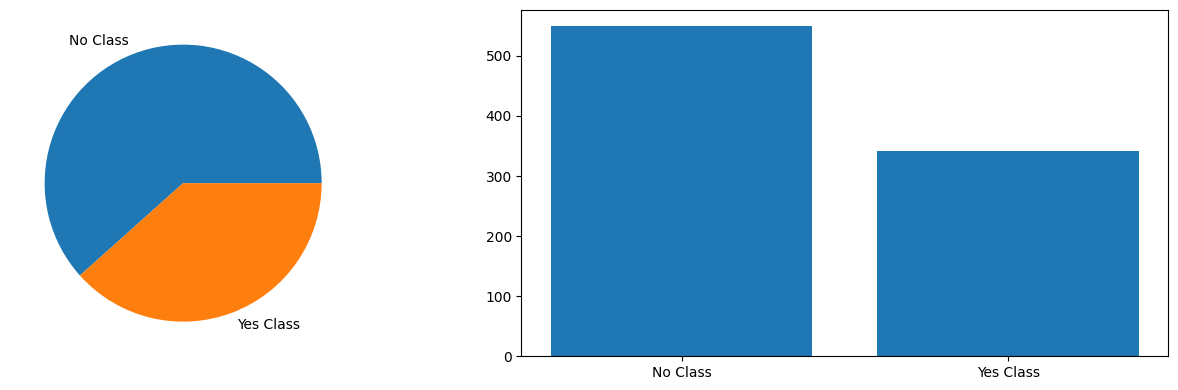

In [9]:
categorical_var_analysis("Survived")

###### Variable Pclass

,Conteo,Porciento,Porciento acumulado
3rd Class,491,55.11 %,55.11 %
1st Class,216,24.24 %,79.35 %
2nd Class,184,20.65 %,100.0 %


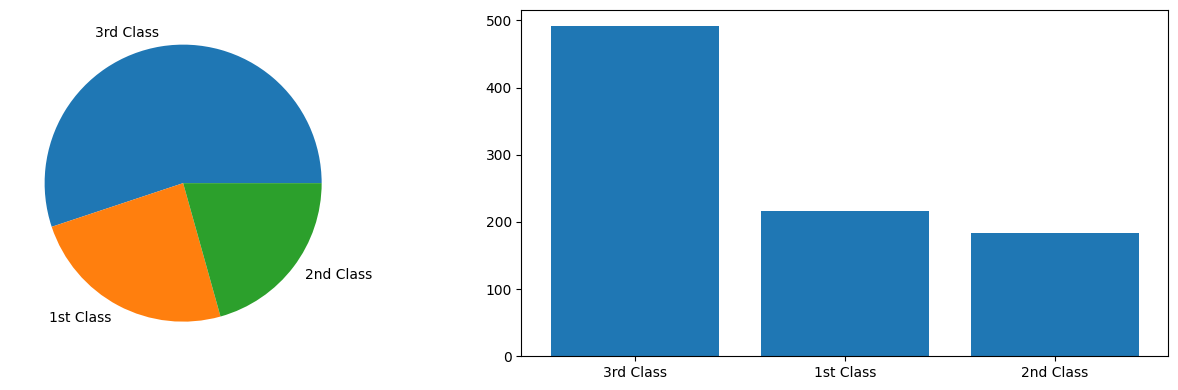

In [10]:
categorical_var_analysis("Pclass")

###### Variable Sex

,Conteo,Porciento,Porciento acumulado
male Class,577,64.76 %,64.76 %
female Class,314,35.24 %,100.0 %


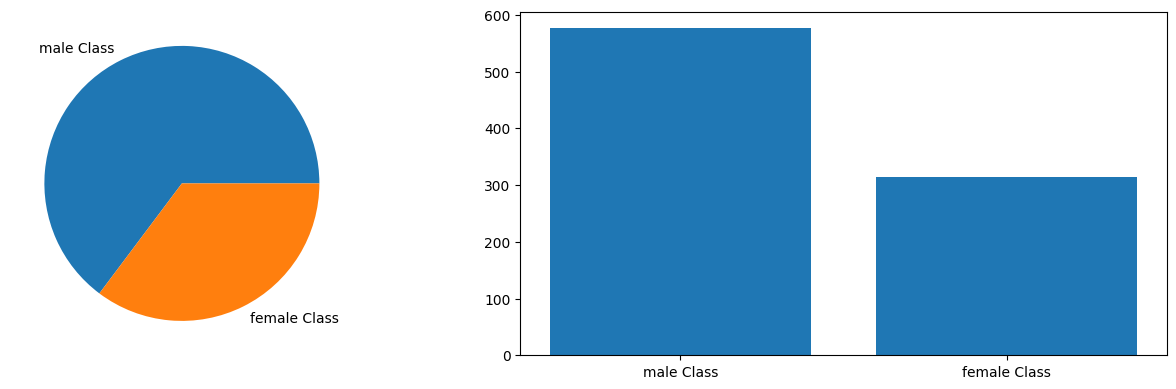

In [11]:
categorical_var_analysis("Sex")

###### Variable Embarked

,Conteo,Porciento,Porciento acumulado
Southampton Class,644,72.28 %,72.28 %
Cherbourg Class,168,18.86 %,91.13 %
Queenstown Class,77,8.64 %,99.78 %


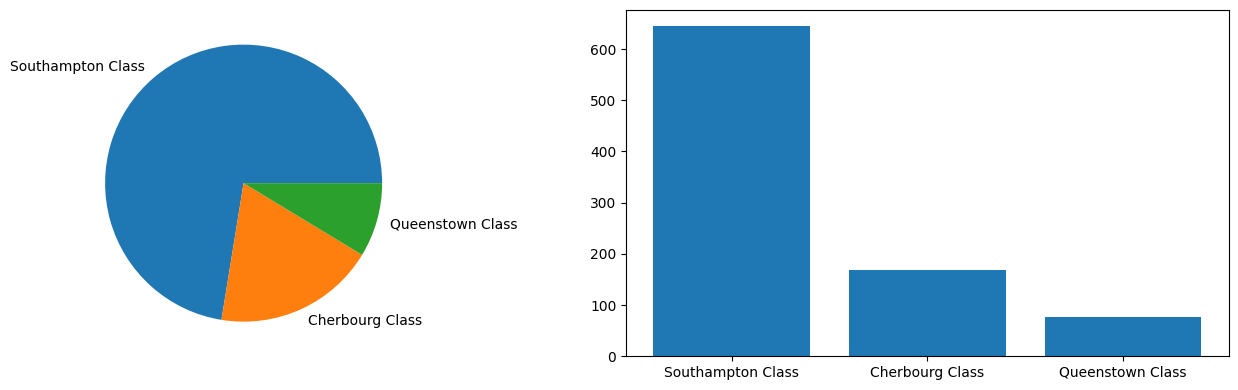

In [12]:
categorical_var_analysis("Embarked")

<AxesSubplot: xlabel='Pclass'>

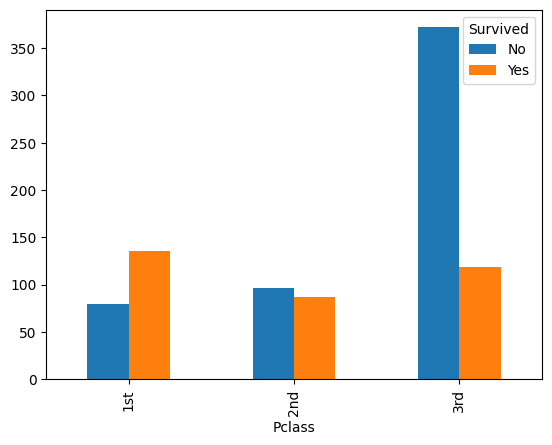

In [13]:
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass'], margins=False)
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass'],margins=True).apply(lambda x: x/len(titanic) * 100, axis=1)
pd.crosstab(index=titanic['Pclass'],columns=titanic['Survived']).plot(kind='bar')

#### Estadísticos básicos sobre las variables numéricas.

In [14]:
#PENDIENTE

#### Análisis de valores nulos que incluya qué variables los contienen, su representatividad dentro del set de datos y qué posible solución podríamos dar.

In [15]:
#PENDIENTE

## Analizando el Titanic

Tras la exploración del conjunto de datos del ejercicio anterior, debería ser muy sencillo obtener insights o conclusiones sobre los pasajeros del Titanic y su hundimiento.

Obviamente, al trabajar únicamente con una muestra del conjunto de datos (sólo estamos utilizando el conjunto de entrenamiento de la competición), las conclusiones alcanzadas no serán completamente correctas y podrán tener cierto sesgo, pero es más que suficiente para un ejercicio académico.

El objetivo de este ejercicio, será utilizar las diferentes funcionalidades de agrupación y agregación que pone a nuestra disposición el módulo pandas de Python para responder a un pequeño conjunto de preguntas sobre la catástrofe.

El listado de preguntas que se deberá responder es el siguiente:
- ¿Fallecieron más mujeres u hombres? ¿Cuánto más en porcentaje?
- ¿Qué clase de pasajeros (primera, segunda o tercera) sobrevivió más?
- ¿Cuál fue la edad media de los supervivientes en cada una de las clases?
- ¿Cuál de los puertos de embarque es el más rico (aquel con la media de precio de billete más cara)?
- ¿Qué correlación hay entre la longitud del nombre de un pasajero y el importe de su billete?

In [16]:
#PENDIENTE